# Линейный SVM "своими руками"

## Генерируем обучающую и тестовую выборку для экспериментов

In [54]:
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from random import randint
import random
from sklearn.svm import SVC, LinearSVC
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')


np.random.seed(42)
random.seed(42)

In [36]:
import matplotlib 
%matplotlib inline

In [1]:
X, y = datasets.make_classification(
    n_samples=10000, n_features=20, 
    n_classes=2, n_informative=20, 
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print(len(X), len(y))
print(len(X_train))

10000 10000
8000


In [105]:
X_train.shape

(8000, 20)

## Пишем свой класс для SVM

In [153]:
class MySVM(object):
    def __init__(self, C=10000):
        self.C = C # regularization constant

    # f(x) = <w,x> + w_0
    def f(self, x):
        return np.dot(x, self.w) #+ self.w0

    # a(x) = [f(x) > 0]
    def a(self, x):
        return 1 if self.f(x) > 0 else 0
    
    # predicting answers for X_test
    def predict(self, X_test):
        fict_column = np.ones(X_test.shape[0])
        X_test = np.hstack((X_test, fict_column.reshape(-1, 1)))
        return np.array([model.a(x) for x in X_test])

    # l2-regularizator
    def reg(self):
        return 1.0 * sum(self.w ** 2) / (2.0 * self.C)

    # l2-regularizator derivative
    def der_reg(self):
        return sum(self.w)/self.C

    # hinge loss
    def loss(self, x, answer):
        return max([0, 1 - answer * self.f(x)])

    # hinge loss derivative
    def der_loss(self, x, answer):
        if all(answer * self.f(x) >= 1):
            return 0
        else:
            return -np.dot(x.T, answer)
    

    # fitting w and w_0 with SGD
    def fit(self, X_train, y_train):
        fict_column = np.ones(X_train.shape[0])
        X_train = np.hstack((X_train, fict_column.reshape(-1, 1)))
        
        dim = X_train.shape[1] 
        self.w = np.random.rand(dim) # initial value for w
        #self.w0 = np.random.randn() # initial value for w_0
        
        # 10000 steps is OK for this example
        # another variant is to continue iterations while error is still decreasing
        for k in range(10000):  
            
            # random example choise
            rand_index = randint(0, len(X_train) - 1) # generating random index
            x = X_train[rand_index]
            y = y_train[rand_index]

            # simple heuristic for step size
            step = 0.5 * 0.9 ** k

            # w update
            self.w -= self.der_loss(X_train, y_train) * self.C + self.der_reg()
            
            # w_0 update
            #self.w0 = self.w0 - self.der_loss(1, y_train) * self.C

## Пробуем обучить наш классификатор и посмотреть на качество на тесте

In [154]:
model = MySVM()
model.fit(X_train, y_train)
print(model.w)

[-2.96329093e+10 -4.42681819e+10 -3.71056898e+10  3.89954749e+11
 -3.47423141e+10 -5.08543616e+10 -3.53309212e+10 -2.31726627e+10
 -4.37589689e+11 -4.23439885e+11 -7.73018950e+10 -5.62328938e+10
  3.55770604e+11 -3.29420796e+10 -4.33999201e+11 -7.69598886e+09
  3.61647125e+11  3.57467187e+11 -5.10751261e+10 -2.14676683e+10
  3.66988683e+11]


In [155]:
predictions = model.predict(X_test)

print(predictions)

[1 1 1 ... 1 1 1]


In [156]:
print(y_test, len(y_test), sum(y_test))

[1 0 1 ... 1 0 1] 2000 991


In [157]:
accuracy_score(y_test, predictions)

0.6855

## Задания:

### - Допишите недостающие функции в MySVM (производные и обновление весов)

### - Сравните качество с sklearn LinearSVC

In [56]:
linear_svc = SVC(random_state=42,  kernel='linear')

linear_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
linear_prediction_svm_from_sklearn = linear_svc.predict(X_test)

print("Точность предсказания для линейного ядра: ", accuracy_score(y_test, linear_prediction_svm_from_sklearn))

Точность предсказания для линейного ядра:  0.7985


In [59]:
non_linear_svc = SVC(random_state=42,  kernel='rbf')

non_linear_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
non_linear_prediction_svm_from_sklearn = non_linear_svc.predict(X_test)

print("Точность предсказания для нелинейного ядра: ", accuracy_score(y_test, non_linear_prediction_svm_from_sklearn))

Точность предсказания для нелинейного ядра:  0.9745


In [61]:
pca = PCA(n_components=2)

pca_data = pca.fit_transform(X)

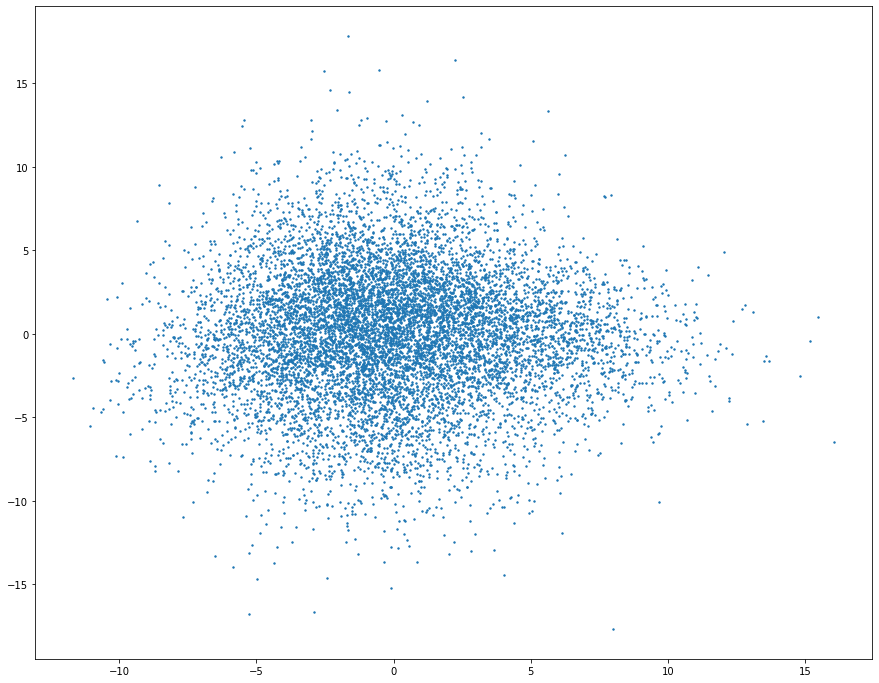

In [62]:
fig = matplotlib.pyplot.figure(figsize=(15, 12))
matplotlib.pyplot.scatter(pca_data[:, 1], pca_data[:, 0], s=2)